In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

In [3]:
file = "data/ngc1245.csv"
data = np.genfromtxt(file, skip_header=1, delimiter=',', filling_values=np.nan)
#data[0][0] = starNumber, data[0][1] =B, data[0][3] = V_corrected, data[0][5] = bv_corrected 
starNumber = data[:,0]
b = data[:,1]
corrected_v = data[:,3]
corrected_bv = data[:,5]

print(np.nanmax(corrected_bv), np.nanmin(corrected_bv))
print(np.nanmax(corrected_v), np.nanmin(corrected_v))

3.148 0.336
19.198 9.805


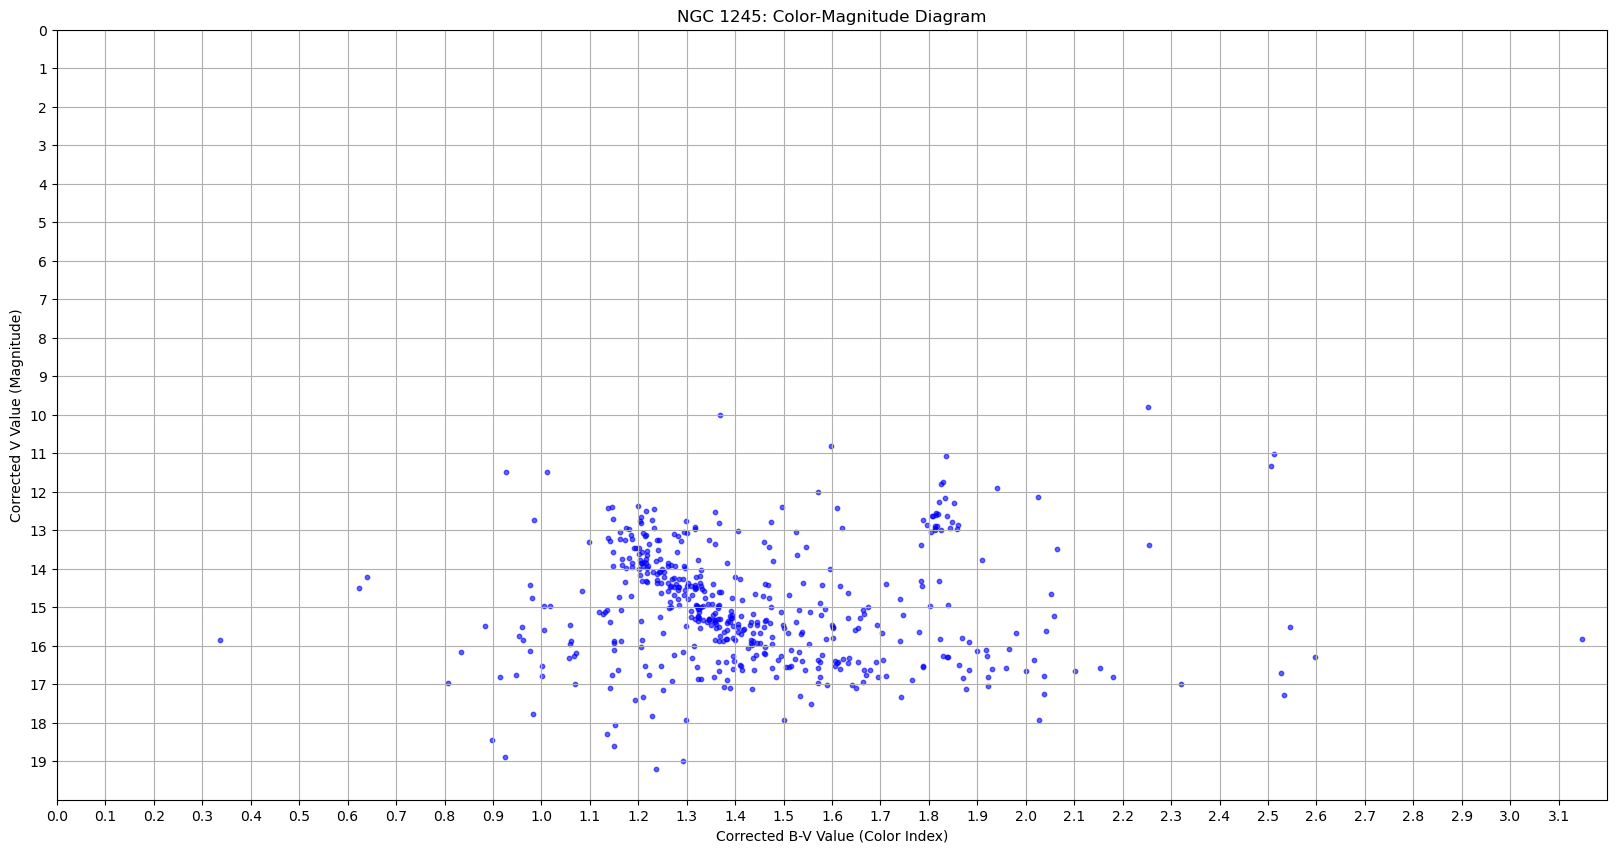

In [4]:
# Create the scatter plot
plt.figure(figsize=(20,10))
plt.scatter(corrected_bv, corrected_v, s=10, c='blue', alpha=0.6)

# Set axis labels and title
plt.xlabel('Corrected B-V Value (Color Index)')
plt.ylabel('Corrected V Value (Magnitude)')
plt.title('NGC 1245: Color-Magnitude Diagram')

# Set the x-axis and y-axis limits to start from 0

xmin, xmax = (0,3.2)
ymin, ymax = (0,20)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

# Set ticks for every 1 unit on both x-axis and y-axis
plt.xticks(np.arange(xmin,xmax, 0.1))
plt.yticks(np.arange(ymin,ymax, 1))


#Invert
plt.gca().invert_yaxis()

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

In [6]:
def classify_spectral_type(bv_value):
    if np.isnan(bv_value):
        return 'NaN'
    elif bv_value <= -0.2:
        return 'O'
    elif -0.2 <= bv_value < 0.2:
        return 'B'
    elif 0.2 <= bv_value < 0.5:
        return 'A'
    elif 0.5 <= bv_value < 0.7:
        return 'F'
    elif 0.7 <= bv_value < 1:
        return 'G'
    elif 1 <= bv_value < 1.6:
        return 'K'
    else:
        return 'M'

spectral_types = np.vectorize(classify_spectral_type)(corrected_bv)
# Filter out 'NaN' values from the array
spectral_types= spectral_types[spectral_types != 'NaN']
# Count the occurrences of each spectral type
unique_spectral_types, counts = np.unique(spectral_types, return_counts=True)
print(unique_spectral_types, counts)

['A' 'F' 'G' 'K' 'M'] [  1   2  16 357 118]


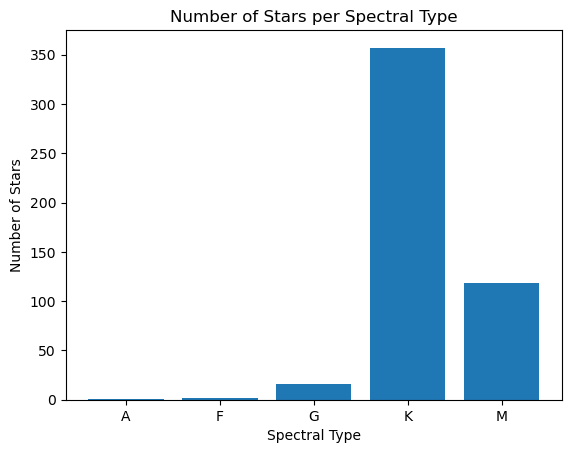

In [7]:
# Create a bar graph
plt.bar(unique_spectral_types, counts)
plt.xlabel('Spectral Type')
plt.ylabel('Number of Stars')
plt.title('Number of Stars per Spectral Type')
plt.show()